# MNIST

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# TODO

## Load data

In [3]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [4]:
# TODO

##  Data exploration

### Question 1
Hint: `plt.imshow`

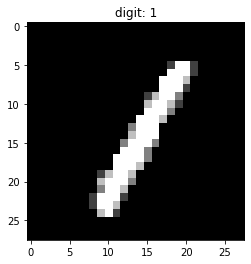

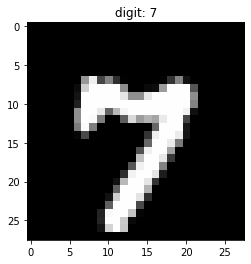

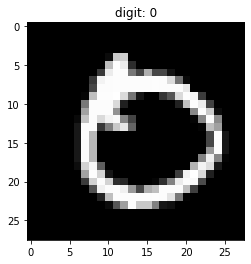

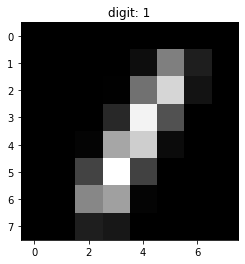

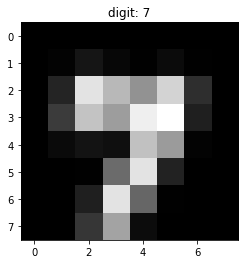

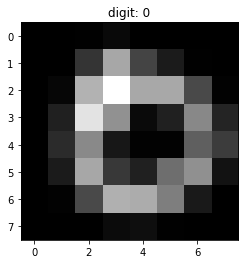

In [5]:
for i in range(3):
    digit_image = mnist_28x28_train[i]
    plt.figure()
    plt.gray()
    plt.title("digit: " + str(train_labels[i]))
    plt.imshow(digit_image)

for i in range(3):
    digit_image = mnist_8x8_train[i]
    plt.figure()
    plt.gray()
    plt.title("digit: " + str(train_labels[i]))
    plt.imshow(digit_image)

##  Data Preparations

### Question 1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer

# 1. split data
# 2. flatten 3d to 2d
# 3. scale
# 4. fit
# 5. predict
# 6. evaluate
# 7. graph/plot
# 8. analyze


# 1. split data
X_train_28x28, X_test_28x28, y_train, y_test = train_test_split(mnist_28x28_train, train_labels, test_size=0.3,
                                                                random_state=42, shuffle=True, stratify=train_labels)
X_train_8x8, X_test_8x8, y_train, y_test = train_test_split(mnist_8x8_train, train_labels, test_size=0.3,
                                                            random_state=42, shuffle=True, stratify=train_labels)

# 2. flatten 3d to 2d
# flatten the features of the data, instead of (,28,28) to (,784)
flat_X_train_28x28 = X_train_28x28.reshape(X_train_28x28.shape[0], -1)
flat_X_test_28x28 = X_test_28x28.reshape(X_test_28x28.shape[0], -1)

# flatten the features of the data, instead of (,8,8 to ,64)
flat_X_train_8x8 = X_train_8x8.reshape(X_train_8x8.shape[0], -1)
flat_X_test_8x8 = X_test_8x8.reshape(X_test_8x8.shape[0], -1)

# 3. scale
# scale both train and test features from rgb (0-255) to black & white (0-1)
min_max_scaler_28x28 = MinMaxScaler()
min_max_scaler_8x8 = MinMaxScaler()

min_max_scaler_28x28.fit(flat_X_train_28x28)
min_max_scaler_8x8.fit(flat_X_train_8x8)

scaled_X_train_28x28 = min_max_scaler_28x28.transform(flat_X_train_28x28)
scaled_X_test_28x28 = min_max_scaler_28x28.transform(flat_X_test_28x28)

scaled_X_train_8x8 = min_max_scaler_8x8.transform(X=flat_X_train_8x8)
scaled_X_test_8x8 = min_max_scaler_8x8.transform(X=flat_X_test_8x8)

## Experiments

### Question 1

In [9]:
print("This question has been answered in the report and additional relevant code can be found in the data preparation.")

random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DummyClassifier": DummyClassifier(strategy="most_frequent"),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    # START ANSWER
    # 𝐄𝐱𝐞𝐫𝐜𝐢𝐬𝐞 1  Extent the list of models with theSVC and LogisticRegression algorithms.
    # Give the SVM a poly kernel. Also, give both algorithms a regularization constant C=0.5 and random_state=42.
    "SVM": SVC(kernel='poly', C=10, random_state=42),
    "LogisticRegression": LogisticRegression(C=10, random_state=42, penalty='none')
    # END ANSWER
}

assert "GaussianNB" in models and isinstance(models["GaussianNB"], GaussianNB), "There is no GaussianNB in models"
assert "DecisionTreeClassifier" in models and isinstance(models["DecisionTreeClassifier"],
                                                         DecisionTreeClassifier), "There is no DecisionTreeClassifier in models"
assert "KNeighborsClassifier" in models and isinstance(models["KNeighborsClassifier"],
                                                       KNeighborsClassifier), "There is no KNeighborsClassifier in models"
assert "SVM" in models and isinstance(models["SVM"], SVC), "There is no SVC in models"
assert "LogisticRegression" in models and isinstance(models["LogisticRegression"],
                                                     LogisticRegression), "There is no LogisticRegression in models"

This question has been answered in the report and additional relevant code can be found in the data preparation.


### Question 2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GaussianNB28x28
- accuracy_score 0.5466666666666666
- f1_score 0.5222102330735034
DummyClassifier28x28
- accuracy_score 0.10577777777777778
- f1_score 0.02023722758127903
DecisionTreeClassifier28x28
- accuracy_score 0.7004444444444444
- f1_score 0.6986654406014072
KNeighborsClassifier28x28
- accuracy_score 0.9102222222222223
- f1_score 0.9093299470235895
SVM28x28
- accuracy_score 0.9057777777777778
- f1_score 0.9054170998865622
LogisticRegression28x28
- accuracy_score 0.8506666666666667
- f1_score 0.8500829429538014


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB8x8
- accuracy_score 0.5253333333333333
- f1_score 0.5081681039276842
DummyClassifier8x8
- accuracy_score 0.10577777777777778
- f1_score 0.02023722758127903
DecisionTreeClassifier8x8
- accuracy_score 0.7475555555555555
- f1_score 0.747536015520293
KNeighborsClassifier8x8
- accuracy_score 0.8977777777777778
- f1_score 0.8973426256664782
SVM8x8
- accuracy_score 0.8933333333333333
- f1_score 0.8931482947497131
LogisticRegression8x8
- accuracy_score 0.8613333333333333
- f1_score 0.8622021678017442


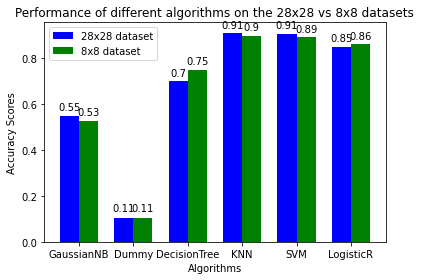

(3750, 28, 28)
(3750, 784)
(3750, 8, 8)
(3750, 64)


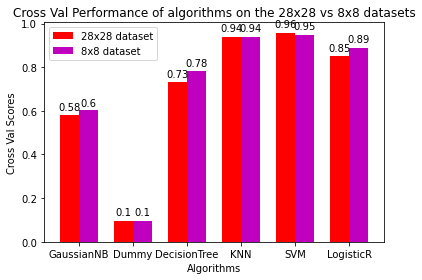

In [10]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, log_loss, make_scorer
from sklearn.metrics import f1_score, accuracy_score

# 4. fit
# 5. predict
# 6. evaluate
# 7. graph/plot
# 8. analyze

accuracies_28x28 = []
accuracies_8x8 = []

# The first plot is done using the simpler “Train-Test Evaluation With Correct Data Preparation” method.
# 4. fit 28x28
for name, model in models.items():
    # START ANSWER
    model.fit(scaled_X_train_28x28, y_train)
    # END ANSWER

for model in models.values():
    check_is_fitted(model)

# 5. predict 28x28 and # 6. evaluate 28x28
for name, model in models.items():
    predictions_28x28 = model.predict(scaled_X_test_28x28)
    f1_score_value = f1_score(y_true=y_test, y_pred=predictions_28x28, average="weighted")
    accuracy = accuracy_score(y_true=y_test, y_pred=predictions_28x28)
    accuracies_28x28 = np.append(accuracies_28x28, accuracy)
    # logloss = log_loss(y_true=y_test, y_pred=model.predict_proba(scaled_X_test_28x28))
    print(name + "28x28")
    print("- accuracy_score", accuracy)
    print("- f1_score", f1_score_value)
    # print("- logloss", logloss)

# 4. fit 8x8
for name, model in models.items():
    # START ANSWER
    model.fit(scaled_X_train_8x8, y_train)
    # END ANSWER

for model in models.values():
    check_is_fitted(model)

# 5. predict 8x8 and # 6. evaluate 8x8
for name, model in models.items():
    predictions_8x8 = model.predict(scaled_X_test_8x8)
    f1_score_value = f1_score(y_true=y_test, y_pred=predictions_8x8, average="weighted")
    accuracy = accuracy_score(y_true=y_test, y_pred=predictions_8x8)
    accuracies_8x8 = np.append(accuracies_8x8, accuracy)
    print(name + "8x8")
    print("- accuracy_score", accuracy)
    print("- f1_score", f1_score_value)


# create plot
def create_comparison_plot(a, b):
    fig, ax = plt.subplots()

    bar_width = 0.35
    X = np.arange(6)

    p1 = plt.bar(X, a, bar_width, color='b',
                 label='28x28 dataset')

    # The bar of second plot starts where the first bar ends
    p2 = plt.bar(X + bar_width, b, bar_width,
                 color='g',
                 label='8x8 dataset')

    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy Scores')
    plt.title('Performance of different algorithms on the 28x28 vs 8x8 datasets')
    plt.xticks(X + (bar_width / 2), (
        'GaussianNB', 'Dummy', 'DecisionTree', 'KNN', 'SVM', 'LogisticR'))
    plt.legend()

    def autolabel(ps):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in ps:
            height = np.round(rect.get_height(), 2)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(p1)
    autolabel(p2)

    plt.tight_layout()
    plt.show()


create_comparison_plot(accuracies_28x28, accuracies_8x8)


# The second plot is “Cross-Validation Evaluation With Correct Data Preparation” using pipelines.
def flatten_features(X):
    X = X.reshape(X.shape[0], -1)
    return X


cross_val_scores_28x28 = []
cross_val_scores_8x8 = []

print(mnist_28x28_train.shape)
flat_mnist_28x28_train = flatten_features(mnist_28x28_train)
print(flat_mnist_28x28_train.shape)

print(mnist_8x8_train.shape)
flat_mnist_8x8_train = flatten_features(mnist_8x8_train)
print(flat_mnist_8x8_train.shape)

for name, model in models.items():
    # define the pipeline

    steps = list()
    steps.append(('scaler', Normalizer()))
    steps.append((name, model))
    pipeline = Pipeline(steps=steps)

    n_splits = 5

    # define the evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate the model using cross-validation
    score = cross_val_score(pipeline, flat_mnist_28x28_train, train_labels, scoring='accuracy', cv=cv,
                            n_jobs=-1)
    cross_val_scores_28x28 = np.append(cross_val_scores_28x28, np.mean(score))

for name, model in models.items():
    # define the pipeline

    steps = list()
    steps.append(('scaler', Normalizer()))
    steps.append((name, model))
    pipeline = Pipeline(steps=steps)

    n_splits = 5

    # define the evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate the model using cross-validation
    score = cross_val_score(pipeline, flat_mnist_8x8_train, train_labels, scoring='accuracy', cv=cv,
                            n_jobs=-1)
    cross_val_scores_8x8 = np.append(cross_val_scores_8x8, np.mean(score))

# Cross validation plot
fig, ax = plt.subplots()

bar_width = 0.35
X = np.arange(6)

p1 = plt.bar(X, cross_val_scores_28x28, bar_width, color='r',
             label='28x28 dataset')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, cross_val_scores_8x8, bar_width,
             color='m',
             label='8x8 dataset')

plt.xlabel('Algorithms')
plt.ylabel('Cross Val Scores')
plt.title('Cross Val Performance of algorithms on the 28x28 vs 8x8 datasets')
plt.xticks(X + (bar_width / 2), (
    'GaussianNB', 'Dummy', 'DecisionTree', 'KNN', 'SVM', 'LogisticR'))
plt.legend()


def autolabel(ps):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ps:
        height = np.round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(p1)
autolabel(p2)

plt.tight_layout()
plt.show()


### Question 3

GaussianNB
- best_score = 0.5551977084827515
best parameters:
DummyClassifier
- best_score = 0.017343388267019345
best parameters:
DecisionTreeClassifier
- best_score = 0.7350274447741012
best parameters:
- DecisionTreeClassifier__max_depth 9
- DecisionTreeClassifier__min_samples_leaf 1
- DecisionTreeClassifier__random_state 42
KNeighborsClassifier
- best_score = 0.9418903107086362
best parameters:
- KNeighborsClassifier__n_neighbors 4
- KNeighborsClassifier__weights distance
SVM
- best_score = 0.9572613664008429
best parameters:
- SVM__C 3
- SVM__kernel poly
- SVM__random_state 42


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
- best_score = 0.8946120728262758
best parameters:
- LogisticRegression__C 9
- LogisticRegression__penalty l2
- LogisticRegression__random_state 42
GaussianNB
- best_score = 0.5811206621158739
best parameters:
DummyClassifier
- best_score = 0.017343388267019345
best parameters:
DecisionTreeClassifier
- best_score = 0.7535267641170078
best parameters:
- DecisionTreeClassifier__max_depth 9
- DecisionTreeClassifier__min_samples_leaf 1
- DecisionTreeClassifier__random_state 42
KNeighborsClassifier
- best_score = 0.940993270523626
best parameters:
- KNeighborsClassifier__n_neighbors 4
- KNeighborsClassifier__weights uniform
SVM
- best_score = 0.9538229692588491
best parameters:
- SVM__C 9
- SVM__kernel rbf
- SVM__random_state 42


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
- best_score = 0.8964331276307884
best parameters:
- LogisticRegression__C 11
- LogisticRegression__penalty l2
- LogisticRegression__random_state 42


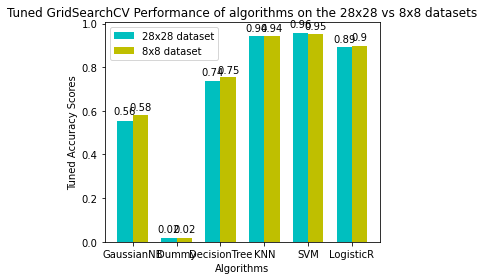

In [11]:
# use flat features
# pipes
# scaling
# gridsearch
# 1 plot with f1 score 1 plot with accuracy score mean

from sklearn.model_selection import GridSearchCV

random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))

model_parameters = {
    "GaussianNB": {

    },
    "DummyClassifier": {

    },
    "DecisionTreeClassifier": {
        'DecisionTreeClassifier__random_state': [random_state],
        'DecisionTreeClassifier__max_depth': np.arange(1, 10),
        'DecisionTreeClassifier__min_samples_leaf': np.arange(1, 5)

    },
    # START ANSWER
    "KNeighborsClassifier": {
        'KNeighborsClassifier__n_neighbors': range(1, 5),
        'KNeighborsClassifier__weights': ['uniform', 'distance']
    },
    "SVM": {
        'SVM__random_state': [random_state],
        'SVM__C': np.arange(1, 15, 2),
        'SVM__kernel': ['linear', 'poly', 'rbf'],
    },
    "LogisticRegression": {
        'LogisticRegression__random_state': [random_state],
        'LogisticRegression__C': np.arange(1, 15, 2),
        'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet', 'none']
    }
    # END ANSWER
}

gridcv_best_28x28 = []
gridcv_best_8x8 = []

for model_name, parameters in model_parameters.items():
    model = models[model_name]

    steps = list()
    steps.append(('scaler', Normalizer()))
    steps.append((model_name, model))
    pipeline = Pipeline(steps=steps)

    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(
        flat_mnist_28x28_train, train_labels)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    gridcv_best_28x28 = np.append(gridcv_best_28x28, best_score)

    print(model_name)
    print("- best_score =", best_score)
    print("best parameters:")
    for k, v in best_params.items():
        print("-", k, v)

for model_name, parameters in model_parameters.items():
    model = models[model_name]

    steps = list()
    steps.append(('scaler', Normalizer()))
    steps.append((model_name, model))
    pipeline = Pipeline(steps=steps)

    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(
        flat_mnist_8x8_train, train_labels)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    gridcv_best_8x8 = np.append(gridcv_best_8x8, best_score)

    print(model_name)
    print("- best_score =", best_score)
    print("best parameters:")
    for k, v in best_params.items():
        print("-", k, v)

# Cross validation plot
fig, ax = plt.subplots()

bar_width = 0.35
X = np.arange(6)

p1 = plt.bar(X, gridcv_best_28x28, bar_width, color='c',
             label='28x28 dataset')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, gridcv_best_8x8, bar_width,
             color='y',
             label='8x8 dataset')

plt.xlabel('Algorithms')
plt.ylabel('Tuned Accuracy Scores')
plt.title('Tuned GridSearchCV Performance of algorithms on the 28x28 vs 8x8 datasets')
plt.xticks(X + (bar_width / 2), (
    'GaussianNB', 'Dummy', 'DecisionTree', 'KNN', 'SVM', 'LogisticR'))
plt.legend()


def autolabel(ps):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ps:
        height = np.round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(p1)
autolabel(p2)

plt.tight_layout()
plt.show()


### Question 4 

In [13]:
print(This question is answered in the report.)

SyntaxError: invalid syntax (<ipython-input-13-0bb6bd25547a>, line 1)

### Question 5

In [ ]:
print(This question is answered in the report.)

### Question 6

In [15]:
from sklearn.preprocessing import Normalizer

def flatten_features(X):
    X = X.reshape(X.shape[0], -1)
    return X

final_X_train_28x28 = mnist_28x28_train.copy()
flat_final_X_train_28x28 = flatten_features(final_X_train_28x28)

final_X_test_28x28 = mnist_28x28_test.copy()
flat_final_X_test_28x28 = flatten_features(final_X_test_28x28)


scaler = Normalizer()

scaler.fit(flat_final_X_train_28x28)

scaled_final_X_train_28x28 = scaler.transform(flat_final_X_train_28x28)
scaled_final_X_test_28x28 = scaler.transform(flat_final_X_test_28x28)

final_SVC_clf = SVC(kernel='poly', C=3, random_state=42)

final_SVC_clf.fit(scaled_final_X_train_28x28, train_labels)

final_prediction = final_SVC_clf.predict(scaled_final_X_test_28x28)

print(final_prediction)

prediction = np.array(final_prediction) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)

[4 3 1 ... 6 6 5]
